# Generate numbers distributed according to a given pdf

With the term sampling we indicate the action of generating pseudo-random numbers distributed according to a specific pdf functional form.
Given the pdf we want to sample we have various options.
- **Try and catch**: works with tevery functional form but it is not very efficient
- **Inverse distribution**: very efficient but we need to know the analytic formulation of the inverse pdf. This is sometimes not accessible
- **Central Limit Theorem**: With the CLT we can generate numbers distributed normally 

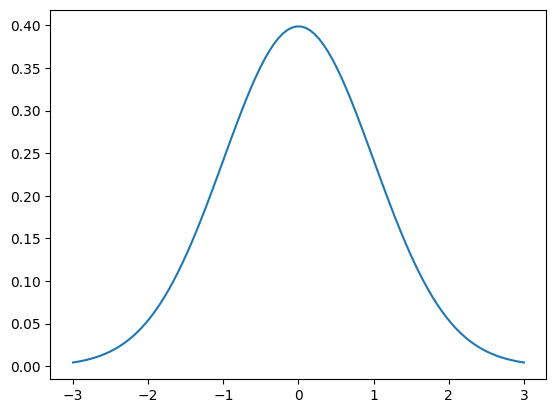

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

MovieWriter imagemagick unavailable; using Pillow instead.


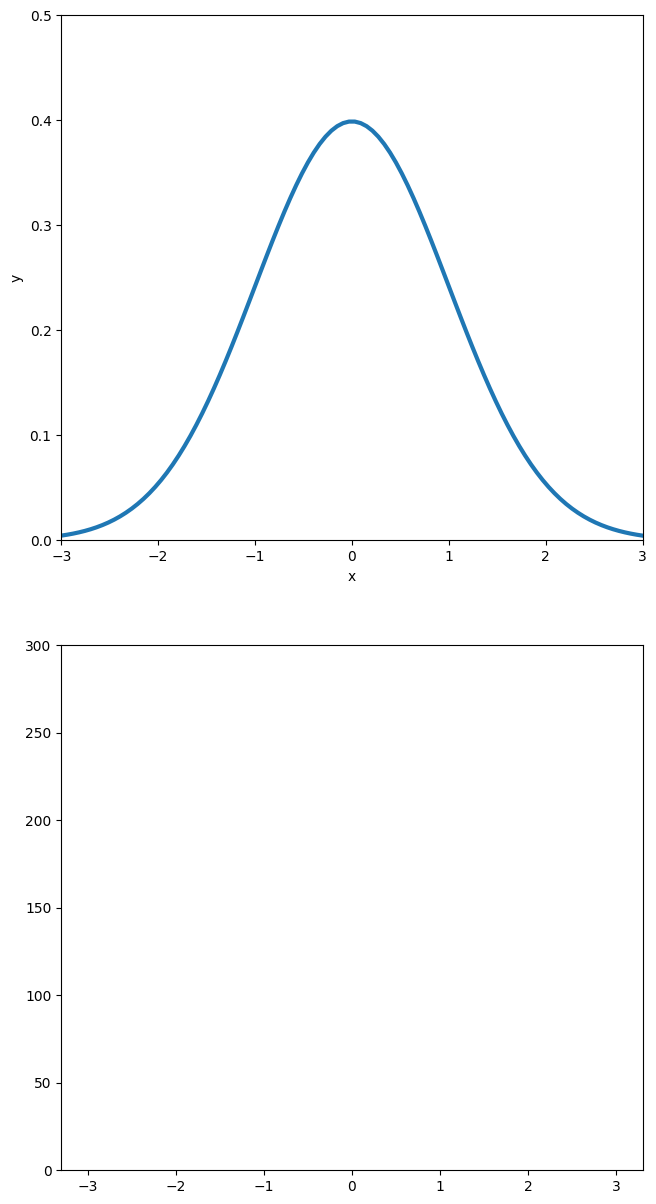

In [36]:
import matplotlib.patches as patches
import matplotlib.animation as animation
import math as mt
from random import random
from random import uniform

ndraws = 5000

fig, ax = plt.subplots(2,1, figsize=(7.5, 15))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
xmin = mu - 3*sigma
xmax = mu + 3*sigma
HIST_BINS = np.linspace(xmin, xmax, 20)
data = np.array([])

ax[0].plot(x, stats.norm.pdf(x, mu, sigma), linewidth=3)

scat = ax[0].scatter(-100, 100, c="r", s=5)

_, _, bar_container = ax[1].hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)

ax[1].set_ylim(top=300)

ax[0].set(xlim=[xmin, xmax], ylim=[0, 0.5], xlabel='x', ylabel='y')

xy = []

for _ in range(int(ndraws)):
    xy.append(np.array([uniform(xmin, xmax), uniform(0.0, 0.5)]))

xy = np.array(xy)

def try_and_catch(xy):
    return np.array([i[0] for i in xy if i[1] < stats.norm.pdf(i[0])])
    

def update(frame):
    # for each frame, update the data stored on each artist.

    # first axis
    rs = xy[:frame*50]
    catch = try_and_catch(rs)
    
    # update the scatter plot:
    scat.set_offsets(rs)

    # Simulate new data coming in.
    data = catch
    n, _ = np.histogram(data, HIST_BINS)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)

    # return bar_container.patches
    
    return (scat,bar_container.patches)


#anim = functools.partial(animate, bar_container=bar_container)
#ani = animation.FuncAnimation(fig, anim, 50, repeat=False, blit=True)

ani = animation.FuncAnimation(fig=fig, func=update, frames=int(ndraws/50), interval=1)
ani.save(filename="GIFs/try_and_catch.gif", writer="imagemagick", fps=500)

# Inverse CDF

MovieWriter imagemagick unavailable; using Pillow instead.


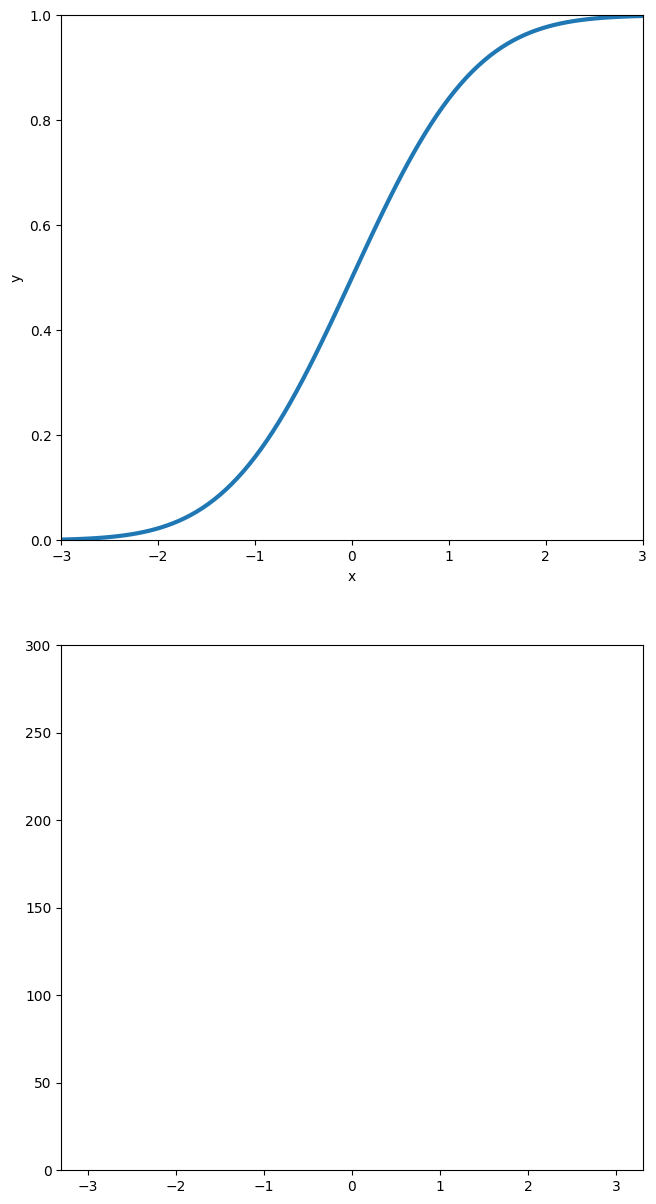

In [77]:
import matplotlib.patches as patches
import matplotlib.animation as animation
import math as mt
from random import random
from random import uniform

ndraws = 2000

fig, ax = plt.subplots(2,1, figsize=(7.5, 15))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
xmin = mu - 3*sigma
xmax = mu + 3*sigma
HIST_BINS = np.linspace(xmin, xmax, 20)
data = np.array([])

ax[0].plot(x, stats.norm.cdf(x, mu, sigma), linewidth=3)

scat = ax[0].scatter(-100, 100,  s=25, facecolors='none', edgecolors='b', zorder=10)
scat2 = ax[0].scatter(-100, 100, s=25, facecolors='none', edgecolors='r', zorder=10)

_, _, bar_container = ax[1].hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)

ax[1].set_ylim(top=300)

ax[0].set(xlim=[xmin, xmax], ylim=[0, 1.0], xlabel='x', ylabel='y')

xy = []

for _ in range(int(ndraws)):
    xy.append(np.array([xmin, uniform(0.0, 1.0)]))

xy = np.array(xy)
x = np.array([stats.norm.ppf(i[1]) for i in xy])

xy2 = np.array([[i, stats.norm.cdf(i)] for i in x])
    

def update(frame):
    # for each frame, update the data stored on each artist.

    # first axis
    x__ = x[:frame*50]
    rs = xy[:frame*50]
    rs2 = xy2[:frame*50]

    # update the scatter plot:
    scat.set_offsets(rs)
    scat2.set_offsets(rs2)

    # Simulate new data coming in.
    data = x__
    n, _ = np.histogram(data, HIST_BINS)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)

    # return bar_container.patches
    
    return (scat,bar_container.patches)


#anim = functools.partial(animate, bar_container=bar_container)
#ani = animation.FuncAnimation(fig, anim, 50, repeat=False, blit=True)

ani = animation.FuncAnimation(fig=fig, func=update, frames=int(ndraws/50), interval=1)
ani.save(filename="GIFs/inverse_cdf.gif", writer="imagemagick", fps=500)

# CLT

MovieWriter imagemagick unavailable; using Pillow instead.


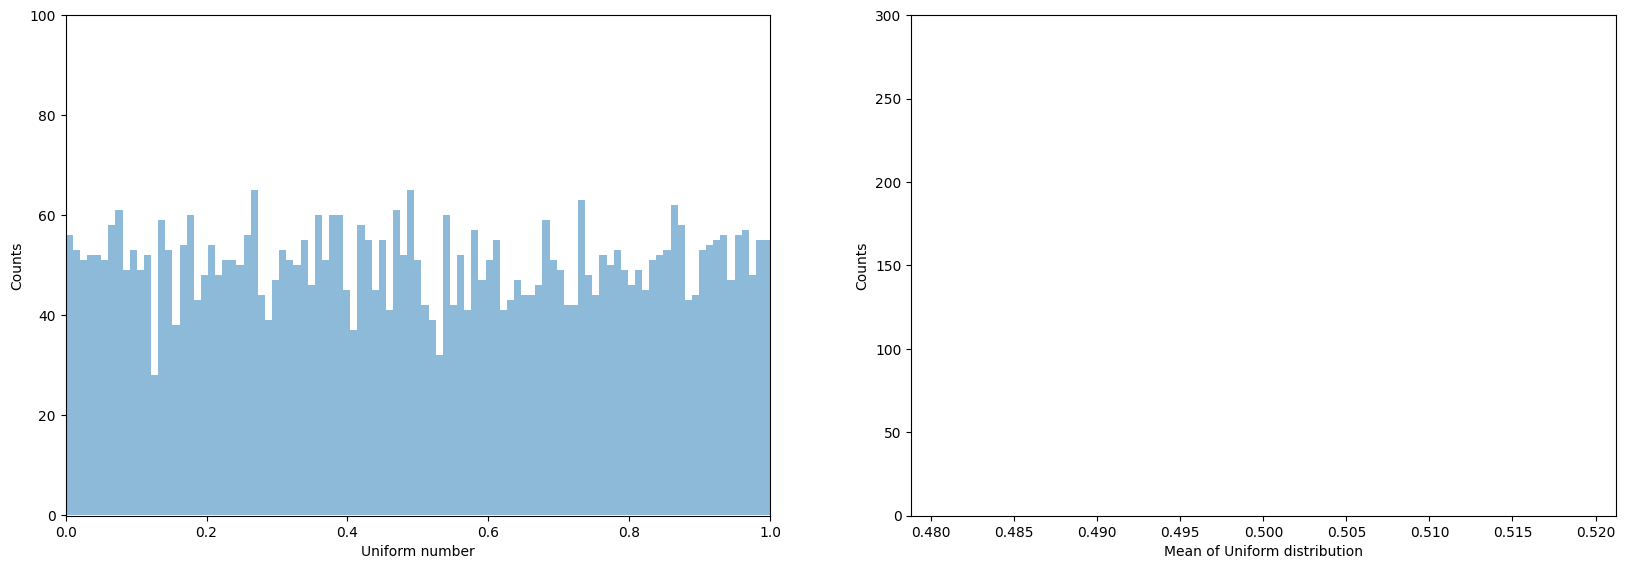

In [122]:
import matplotlib.patches as patches
import matplotlib.animation as animation
import math as mt
from random import random
from random import uniform

nexp = 1000
ndraws = 5000

fig, ax = plt.subplots(1,2, figsize=(20, 6.5))

HIST_BINS1 = np.linspace(0, 1, 100)
data = np.array([])


mu = 0.5
variance = 0.00005
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
xmin = mu - 3*sigma
xmax = mu + 3*sigma

HIST_BINS2 = np.linspace(xmin, xmax, 20)
data2 = np.array([])

_, _, bar_container1 = ax[0].hist(data, HIST_BINS1, lw=1,
                              ec="yellow", fc="green", alpha=0.5)

_, _, bar_container2 = ax[1].hist(data2, HIST_BINS2, lw=1,
                              ec="yellow", fc="green", alpha=0.5)

ax[0].set_ylim(top=100)
ax[1].set_ylim(top=300)

ax[0].set(xlim=[0, 1], xlabel='Uniform number', ylabel='Counts')
ax[1].set(xlim=[xmin, xmax], xlabel='Mean of Uniform distribution', ylabel='Counts')

means = []
uniforms = []

for _ in range(nexp):

    unif = np.array([uniform(0.0, 1.0) for _ in range(ndraws)])
    uniforms.append(unif)
    means.append(unif.mean())


means = np.array(means)
uniforms = np.array(uniforms)
    

def update(frame):
    # for each frame, update the data stored on each artist.

    # first axis uniform distribution
    data1 = uniforms[frame*20]
    n, _ = np.histogram(data1, HIST_BINS1)
    for count, rect in zip(n, bar_container1.patches):
        rect.set_height(count)

    # Second axis is the CLT
    data2 = means[:frame*20]
    n2, _ = np.histogram(data2, HIST_BINS2)
    for count, rect2 in zip(n2, bar_container2.patches):
        rect2.set_height(count)

    # return bar_container.patches
    
    return (bar_container1.patches, bar_container2.patches)


#anim = functools.partial(animate, bar_container=bar_container)
#ani = animation.FuncAnimation(fig, anim, 50, repeat=False, blit=True)

ani = animation.FuncAnimation(fig=fig, func=update, frames=int(nexp/20), interval=1)
ani.save(filename="GIFs/clt.gif", writer="imagemagick", fps=500)